### MoodFlage
- Use `Mood_Swing` to determine if the user requires treatment.

In [152]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# label encoder 
from sklearn.preprocessing import LabelEncoder
# data splitting
from sklearn.model_selection import train_test_split,cross_val_score,KFold
# model for training
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [153]:
# Reading the CSV file
dataPath = "../data/raw"
file_path = os.path.join(dataPath, 'data.csv')
df = pd.read_csv(file_path)
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [154]:
# checking unique values in 'Category' column
for col in df.columns:
    unique_categories = df[col].unique()
    print(col ,"\n\n", unique_categories , "\n\n")

Timestamp 

 ['8/27/2014 11:29' '8/27/2014 11:31' '8/27/2014 11:32' '8/27/2014 11:37'
 '8/27/2014 11:43' '8/27/2014 11:49' '8/27/2014 11:51' '8/27/2014 11:52'
 '8/27/2014 12:18' '8/27/2014 12:37' '8/27/2014 12:39' '8/27/2014 12:40'
 '8/27/2014 12:49' '8/27/2014 12:50' '8/27/2014 12:51' '8/27/2014 12:53'
 '8/27/2014 12:55' '8/27/2014 12:57' '8/27/2014 13:06' '8/27/2014 13:31'
 '8/27/2014 13:47' '8/27/2014 13:49' '8/27/2014 13:55' '8/27/2014 14:11'
 '8/27/2014 14:13' '8/27/2014 14:16' '8/27/2014 14:19' '8/27/2014 14:27'
 '8/27/2014 14:31' '8/27/2014 14:52' '8/27/2014 15:22' '8/27/2014 15:24'
 '8/27/2014 15:29' '8/27/2014 15:34' '8/27/2014 15:35' '8/27/2014 15:36'
 '8/27/2014 16:02' '8/27/2014 16:14' '8/27/2014 16:19' '8/27/2014 16:21'
 '8/27/2014 16:25' '8/27/2014 16:27' '8/27/2014 16:35' '8/27/2014 16:42'
 '8/27/2014 17:08' '8/27/2014 17:32' '8/27/2014 17:37' '8/27/2014 17:48'
 '8/27/2014 17:56' '8/27/2014 18:02' '8/27/2014 18:59' '8/27/2014 19:05'
 '8/27/2014 20:33' '8/27/2014 20:48' '

### Data Understanding
- EDA
- Data Consitency
- Handling Missing data
- Checking Features

In [155]:
# handling missing values
df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [156]:
df.dropna(inplace = True) 
df.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [157]:
# removing duplicating from the dataset
df.duplicated().mean()

np.float64(0.008023345707301106)

In [158]:
df.drop_duplicates(inplace=True)
df.duplicated().mean() 

np.float64(0.0)

In [159]:
# Removing unnecessary column 
df.drop(columns=['Timestamp'], inplace=True) 
df.columns 

Index(['Gender', 'Country', 'Occupation', 'self_employed', 'family_history',
       'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')

In [160]:
# visualization of the data as plots
def plot4categories(category, x_rotation=90):
    """Bar plot for frequent categories."""
    mostCount = df[category].value_counts().nlargest(10).reset_index(name="count")
    print("Category :", category,"\n")
    print(mostCount)
    plt.figure(figsize=(4,3))
    sns.barplot(data=mostCount, x=category, y="count",color="yellow", edgecolor="black")
    plt.title(f"Frequent {category}")
    plt.xlabel(category.upper())
    plt.xticks(rotation=x_rotation)
    plt.show()
    
def check_long_tail(column):
    """Check for Long Tail Distribution."""
    value_counts = df[column].value_counts()
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=value_counts.values, label='Frequency')
    plt.title(f'Distribution of {column}')
    plt.yscale("log") 
    plt.grid(True)
    plt.show()


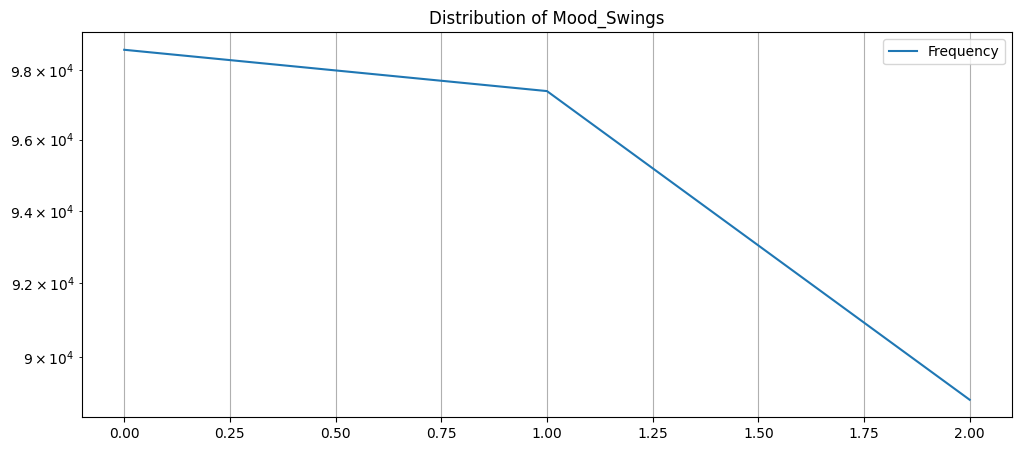

Category : Gender 

   Gender   count
0    Male  234000
1  Female   50858


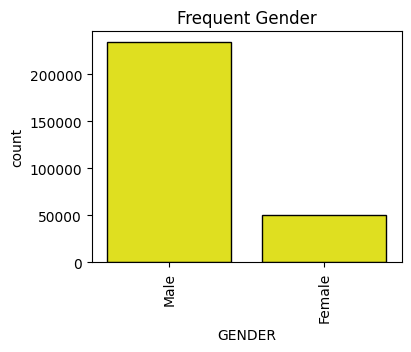

Category : Country 

          Country   count
0   United States  165869
1  United Kingdom   50576
2          Canada   17529
3       Australia    6014
4     Netherlands    5891
5         Ireland    5542
6         Germany    4680
7          Sweden    2812
8           India    2771
9          France    2340


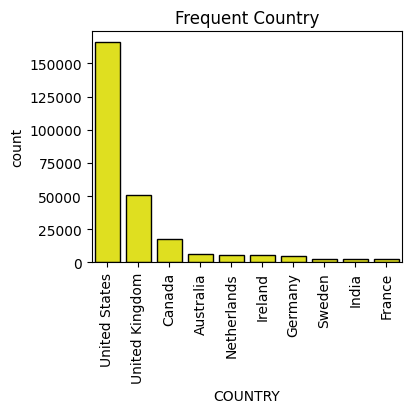

Category : Occupation 

  Occupation  count
0  Housewife  64728
1    Student  60164
2  Corporate  59614
3     Others  51430
4   Business  48922


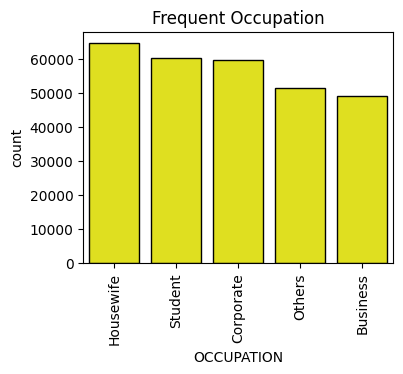

Category : self_employed 

  self_employed   count
0            No  255711
1           Yes   29147


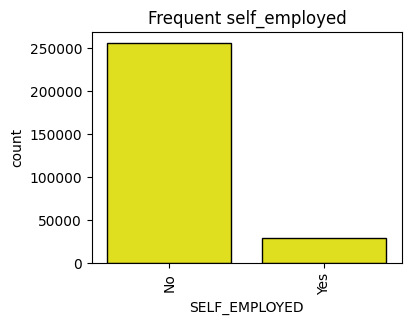

Category : family_history 

  family_history   count
0             No  172357
1            Yes  112501


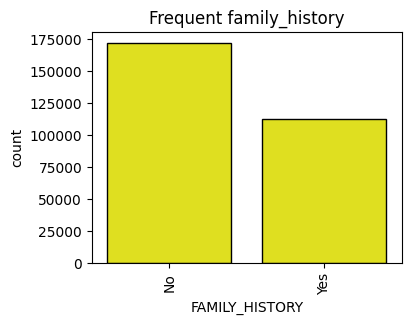

Category : treatment 

  treatment   count
0       Yes  143331
1        No  141527


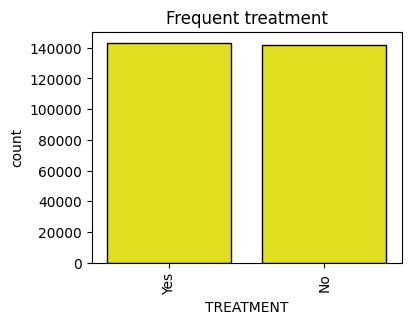

Category : Days_Indoors 

         Days_Indoors  count
0           1-14 days  61994
1          31-60 days  58984
2    Go out Every day  56938
3  More than 2 months  54430
4          15-30 days  52512


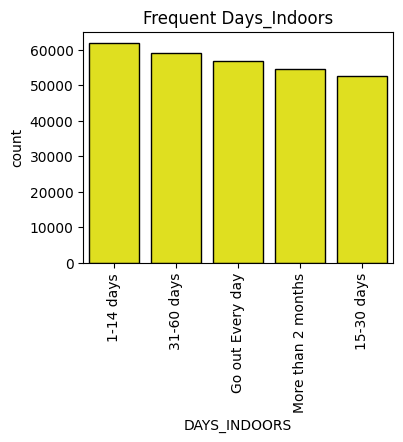

Category : Growing_Stress 

  Growing_Stress  count
0          Maybe  97540
1            Yes  96978
2             No  90340


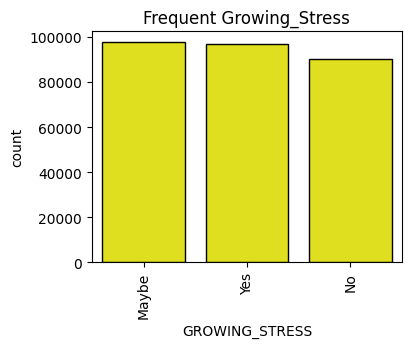

Category : Changes_Habits 

  Changes_Habits   count
0            Yes  106844
1          Maybe   92602
2             No   85412


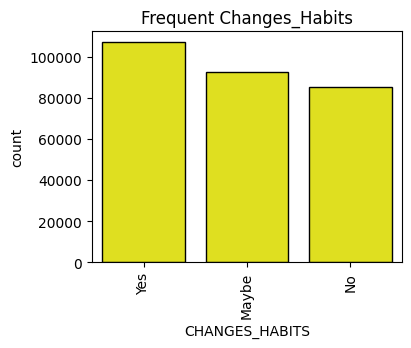

Category : Mental_Health_History 

  Mental_Health_History   count
0                    No  101474
1                 Maybe   92808
2                   Yes   90576


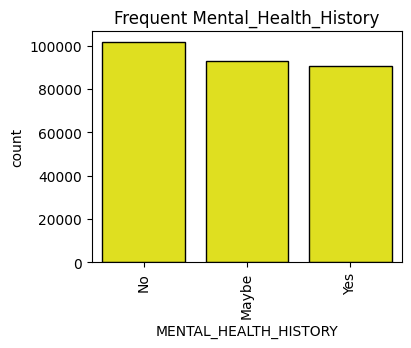

Category : Mood_Swings 

  Mood_Swings  count
0      Medium  98592
1         Low  97392
2        High  88874


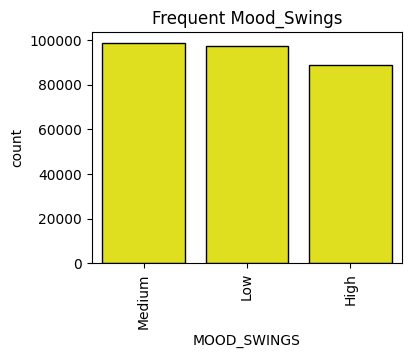

Category : Coping_Struggles 

  Coping_Struggles   count
0               No  150318
1              Yes  134540


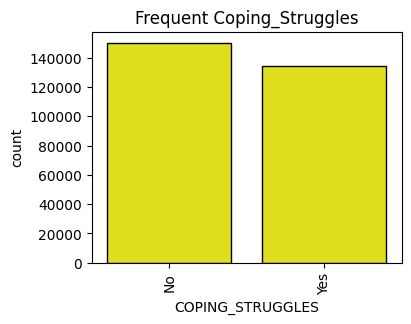

Category : Work_Interest 

  Work_Interest   count
0            No  103136
1         Maybe   98592
2           Yes   83130


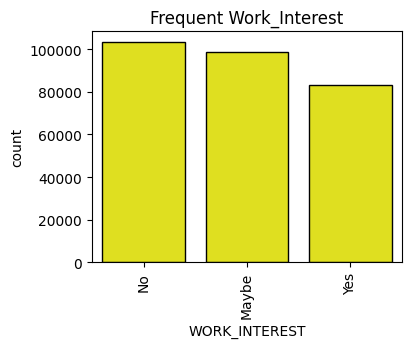

Category : Social_Weakness 

  Social_Weakness   count
0           Maybe  100746
1              No   94746
2             Yes   89366


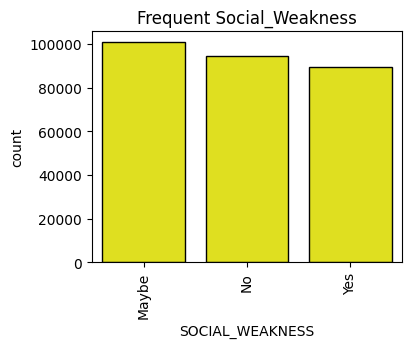

Category : mental_health_interview 

  mental_health_interview   count
0                      No  227036
1                   Maybe   49981
2                     Yes    7841


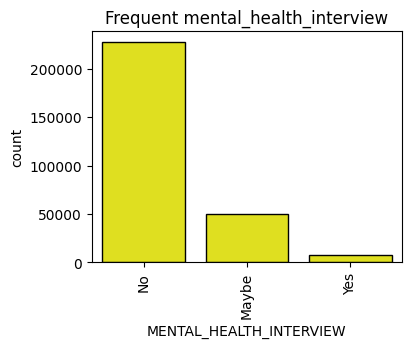

Category : care_options 

  care_options   count
0           No  115233
1          Yes   93577
2     Not sure   76048


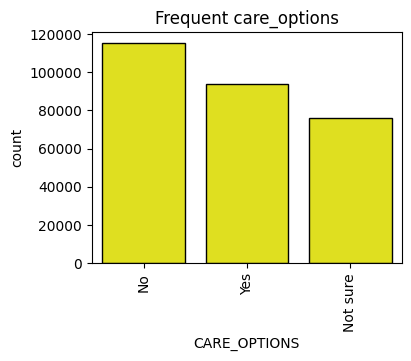

In [161]:
# long_tail_distribution checking
check_long_tail('Mood_Swings')
# plots for each cols
for col in df.columns:
    plot4categories(col)

In [162]:
df.columns

Index(['Gender', 'Country', 'Occupation', 'self_employed', 'family_history',
       'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')

### Data Preprocessing

In [184]:
df['Country'].unique() , df.loc[3]

(array(['United States', 'Poland', 'Australia', 'Canada', 'United Kingdom',
        'South Africa', 'Sweden', 'New Zealand', 'Netherlands', 'India',
        'Belgium', 'Ireland', 'France', 'Portugal', 'Brazil', 'Costa Rica',
        'Russia', 'Germany', 'Switzerland', 'Finland', 'Israel', 'Italy',
        'Bosnia and Herzegovina', 'Singapore', 'Nigeria', 'Croatia',
        'Thailand', 'Denmark', 'Mexico', 'Greece', 'Moldova', 'Colombia',
        'Georgia', 'Czech Republic', 'Philippines'], dtype=object),
 Gender                            Female
 Country                    United States
 Occupation                     Corporate
 self_employed                         No
 family_history                       Yes
 treatment                            Yes
 Days_Indoors                   1-14 days
 Growing_Stress                       Yes
 Changes_Habits                        No
 Mental_Health_History                Yes
 Mood_Swings                       Medium
 Coping_Struggles           

In [187]:
# Importing LabelEncoder for encoding categorical variables
# le = LabelEncoder()
# transformed_df = df.apply(le.fit_transform) 
# transformed_df.nunique()
# transformed_df.loc[52524]
# 0 -> high , 1 -> low , 2 -> medium

encoders = {}
transformed_df = df.copy()

for col in df.columns:
    le = LabelEncoder()
    transformed_df[col] = le.fit_transform(df[col].astype(str))  # Use original string values
    encoders[col] = le
    
transformed_df.nunique()

Gender                      2
Country                    35
Occupation                  5
self_employed               2
family_history              2
treatment                   2
Days_Indoors                5
Growing_Stress              3
Changes_Habits              3
Mental_Health_History       3
Mood_Swings                 3
Coping_Struggles            2
Work_Interest               3
Social_Weakness             3
mental_health_interview     3
care_options                3
dtype: int64

In [ ]:
transformed_df['Country'].unique() ,transformed_df[transformed_df['Country'] == 34]

(array([34, 25,  0,  4, 33, 29, 30, 22, 21, 15,  1, 16, 11, 26,  3,  6, 27,
        13, 31, 10, 17, 18,  2, 28, 23,  7, 32,  9, 19, 14, 20,  5, 12,  8,
        24]),
         Gender  Country  Occupation  self_employed  family_history  treatment  \
 3            0       34           1              0               1          1   
 4            0       34           1              0               1          1   
 7            0       34           1              0               0          0   
 8            0       34           1              0               0          0   
 9            0       34           1              0               0          0   
 ...        ...      ...         ...            ...             ...        ...   
 292358       1       34           0              0               0          0   
 292359       1       34           0              1               1          1   
 292361       1       34           0              0               1          0   
 292362       

In [189]:
df.nunique()

Gender                      2
Country                    35
Occupation                  5
self_employed               2
family_history              2
treatment                   2
Days_Indoors                5
Growing_Stress              3
Changes_Habits              3
Mental_Health_History       3
Mood_Swings                 3
Coping_Struggles            2
Work_Interest               3
Social_Weakness             3
mental_health_interview     3
care_options                3
dtype: int64

In [190]:
# separating features and target variable
X = transformed_df.drop("Mood_Swings", axis = 1)
y = transformed_df["Mood_Swings"]

In [191]:
# data preprocessing :  splitting the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

X_train.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
139129,1,34,0,0,0,0,1,2,0,2,0,0,2,1,0
168508,1,32,1,1,0,0,0,1,0,2,1,1,2,0,0
83340,1,4,4,0,0,1,0,2,2,1,0,0,2,0,0
237830,1,33,1,0,0,0,4,1,1,2,0,2,2,1,0
131119,1,34,2,0,1,1,2,0,0,1,1,2,2,0,2


In [192]:
# saved to the processed data
X_train.to_csv('../data/processed/X_train.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
y_val.to_csv('../data/processed/y_val.csv', index=False)

## Training Model
- Decision Tree
- RandomeForest
- XGB Classifier

In [193]:
# ---- Container ---- #
models = []

# decision tree 
print("Decision Tree Classifier")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=KFold(10, shuffle=True), scoring='accuracy', n_jobs=-1)
print(f"Mean Accuracy: {dt_scores.mean():.4f}, Std Dev: {dt_scores.std():.4f}")

dict_dt = {
    'Model': 'Decision Tree',
    'Mean Accuracy': dt_scores.mean(),
    'Std Dev': dt_scores.std()
}
models.append(dict_dt)

# random forest
print("Random Forest Classifier")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=KFold(10, shuffle=True), scoring='accuracy', n_jobs=-1)
print(f"Mean Accuracy: {rf_scores.mean():.4f}, Std Dev: {rf_scores.std():.4f}")
dict_rf = {
    'Model': 'Random Forest',
    'Mean Accuracy': rf_scores.mean(),
    'Std Dev': rf_scores.std()
}
models.append(dict_rf)

# xgboost
print("XGBoost Classifier")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=KFold(10, shuffle=True), scoring='accuracy', n_jobs=-1)
print(f"Mean Accuracy: {xgb_scores.mean():.4f}, Std Dev: {xgb_scores.std():.4f}")
dict_xgb = {
    'Model': 'XGBoost',
    'Mean Accuracy': xgb_scores.mean(),
    'Std Dev': xgb_scores.std()
}  
models.append(dict_xgb)


models

Decision Tree Classifier
Mean Accuracy: 0.9750, Std Dev: 0.0011
Random Forest Classifier
Mean Accuracy: 0.9752, Std Dev: 0.0007
XGBoost Classifier


c:\Users\egonh\.virtualenvs\moodflag-jMQOrguh\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:44:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mean Accuracy: 0.9776, Std Dev: 0.0012


[{'Model': 'Decision Tree',
  'Mean Accuracy': np.float64(0.9749523181228803),
  'Std Dev': np.float64(0.0011306819883333504)},
 {'Model': 'Random Forest',
  'Mean Accuracy': np.float64(0.9751863539539583),
  'Std Dev': np.float64(0.0007209988637690677)},
 {'Model': 'XGBoost',
  'Mean Accuracy': np.float64(0.9776086339114819),
  'Std Dev': np.float64(0.0012200739717178597)}]

#### Validating the Model

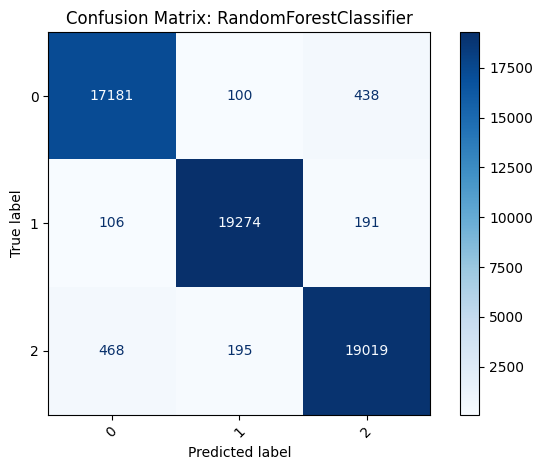

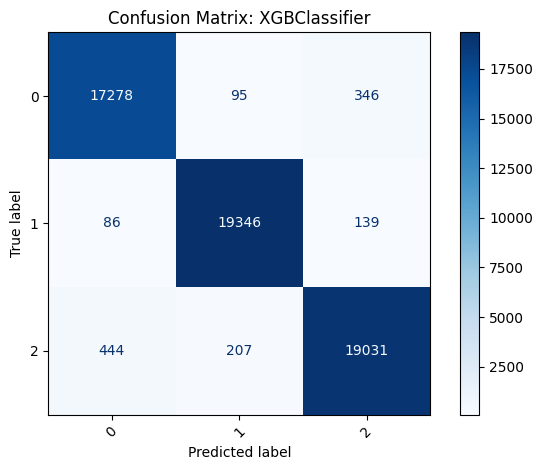

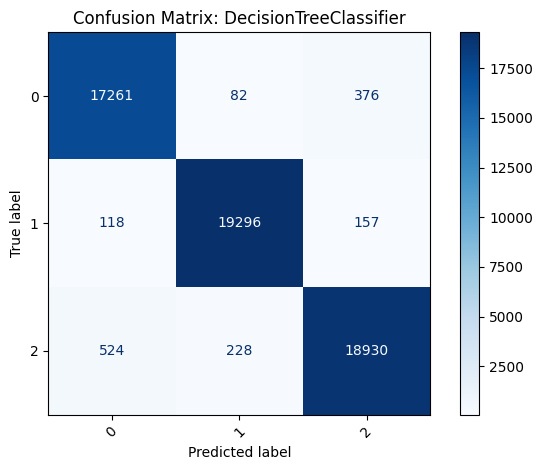

[{'Model': 'RandomForestClassifier',
  'Accuracy': 0.9737063820824264,
  'Precision': 0.9737071760620043,
  'Recall': 0.9737063820824264,
  'F1-Score': 0.9737062182289075},
 {'Model': 'XGBClassifier',
  'Accuracy': 0.9768833813101172,
  'Precision': 0.9768782385486564,
  'Recall': 0.9768833813101172,
  'F1-Score': 0.976871588739555},
 {'Model': 'DecisionTreeClassifier',
  'Accuracy': 0.9739345643473987,
  'Precision': 0.9739548242318639,
  'Recall': 0.9739345643473987,
  'F1-Score': 0.9739259238688275}]

In [195]:
validation_scores = []
def predict_validation(model, X_val):
    y_pred = model.predict(X_val)
    report = classification_report(y_val, y_pred, output_dict=True)
    acc = accuracy_score(y_val, y_pred)
    validation_scores.append({
        'Model': model.__class__.__name__,
        'Accuracy': acc,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })
    
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {model.__class__.__name__}')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    return y_pred;


predict_validation(rf_model, X_val)
predict_validation(xgb_model, X_val)
predict_validation(dt_model, X_val)

#  notes
#  class 0 > correct , not correct , not correct 
#  class 1 > not correct , correct , not correct
#  class 2 > not correct , not correct , correct

validation_scores

## Saving Model

In [ ]:

import joblib
joblib.dump(encoders, "../model/label_encoders.joblib")
joblib.dump(xgb_model, "../model/xgb_model.pkl")


['../model/xgb_model.pkl']

In [200]:
df.loc[
    df['Mood_Swings'] == 'High'
]
df.iloc[487]

Gender                            Female
Country                    United States
Occupation                       Student
self_employed                         No
family_history                        No
treatment                             No
Days_Indoors                   1-14 days
Growing_Stress                       Yes
Changes_Habits                     Maybe
Mental_Health_History              Maybe
Mood_Swings                         High
Coping_Struggles                      No
Work_Interest                         No
Social_Weakness                      Yes
mental_health_interview               No
care_options                    Not sure
Name: 502, dtype: object